In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless numpy matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


Saving capchas (1).jpeg to capchas (1) (1).jpeg


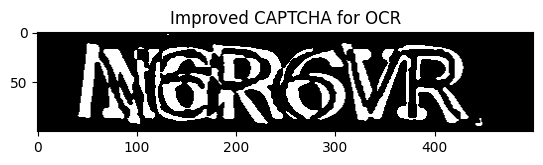

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from google.colab import files

# Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize to enhance OCR readability
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Apply Gaussian blur to remove small noise
blurred = cv2.GaussianBlur(img, (5,5), 0)

# Apply median blur to further smooth the text
blurred = cv2.medianBlur(blurred, 3)

# Adaptive thresholding for better contrast
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 31, 2)

# Apply softer erosion (reduce to 1 iteration)
kernel = np.ones((2,2), np.uint8)  # Reduce kernel size for softer impact
processed = cv2.erode(binary, kernel, iterations=1)  # Only 1 iteration of erosion

# Show Improved Image
plt.imshow(processed, cmap='gray')
plt.title("Improved CAPTCHA for OCR")
plt.show()


In [ ]:
custom_config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
extracted_text = pytesseract.image_to_string(processed, config=custom_config)

print("\n🔹 Extracted CAPTCHA Text (Improved OCR):", extracted_text.strip())



🔹 Extracted CAPTCHA Text (Improved OCR): NERSVR
